In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import sys

sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../contracts/")

import config
import contracts.dataset_contract_declaration as dcd
import contracts.contracts_configurations.dataset.PCT1.dataset_contract_actions as pct1
import contracts.contracts_configurations.dataset.PCT2.dataset_contract_actions as pct2
import contracts.contracts_configurations.dataset.RBG1.dataset_contract_actions as rbg1
import contracts.contracts_configurations.dataset.RBG2.dataset_contract_actions as rbg2
import contracts.contracts_configurations.dataset.KTT1.dataset_contract_actions as ktt1
import contracts.contracts_configurations.dataset.KTT2.dataset_contract_actions as ktt2
import contracts.contracts_configurations.dataset.AMG1.dataset_contract_actions as amg1
import contracts.contracts_configurations.dataset.AMG2.dataset_contract_actions as amg2

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size']=10

In [2]:
def create_postconversion_checkup_table(data_set, data_contract, ignore_groups):
    tag_groups = data_contract.TAG_GROUP_MAP
    constraints = data_contract.TAGS_TO_ACTIONS["CONST_LIMITS"]
    table_source = dict()
    
    table_source["varname"] = []
    table_source["constraint_ratio"] = []
    table_source["min"] = []
    table_source["max"] = []
    table_source["groups"] = []
    
    sample_n = data_set.shape[0]
    
    for group, members in tag_groups.items():
        if group not in ignore_groups:
            
            for var in members:
                if var not in table_source["varname"]:
                    table_source["varname"].append(var)
                    var_values = data_set[var].dropna()
                    table_source["min"].append(min(var_values))
                    table_source["max"].append(max(var_values))
                    if var in constraints:
                        table_source["constraint_ratio"].append(
                            sum(data_set[var].apply(lambda x: constraints[var](x, 0))) / sample_n
                        )
                    else:
                        table_source["constraint_ratio"].append("")
                        
                    table_source["groups"].append([group])
                    
                else:
                    idx = table_source["varname"].index(var)
                    table_source["groups"][idx].append(group)
                    
    return pd.DataFrame(table_source).set_index("varname")

def visualize_postconversion_constraints(data_set, data_contract, ignore_groups):
    constraints = data_contract.TAGS_TO_ACTIONS["CONST_LIMITS"]
    indices = [i for i in range(len(data_set.index))]
    pdf = matplotlib.backends.backend_pdf.PdfPages("latest.pdf")
    

    for var, constraint in constraints.items():
        values = data_set[var]
        passing_boolean_mask = np.ma.masked_where(values.apply(lambda x: constraint(x, 0)), values)
        not_passing_boolean_mask = np.ma.masked_where(values.apply(lambda x: not constraint(x, 0)), values)
        
        
        fig, ax = plt.subplots()
        ax.plot(indices, passing_boolean_mask, indices, not_passing_boolean_mask)
        fig.suptitle(f"{var} lineplot incl. constraints")
        plt.xlabel('Timeserie Index')
        plt.ylabel(var)
        plt.show()
        pdf.savefig(fig)
    pdf.close()

In [3]:
#PCT1
suffix = 2
converted_dataset = pd.read_csv(f"dataset_{config.PCT1_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, pct1, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
Burner Tilt Position 1L,,0.000000,59.269531,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 4R,,0.000000,59.427734,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2L,,0.000000,59.003906,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 3L,,0.000000,59.119141,[RECOMMENDATION_MV_VARIABLES]
Total Secondary Air Flow Sides Sum,0.300694,6.830890,471.053955,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 3R,,0.000000,59.691406,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 4L,,0.000000,59.443359,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2R,,0.000000,60.160156,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 1R,,0.000000,50.000000,[RECOMMENDATION_MV_VARIABLES]


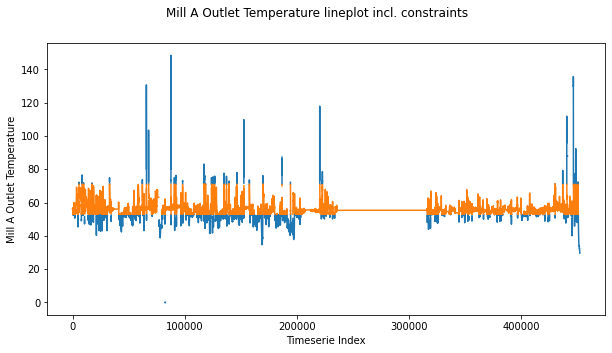

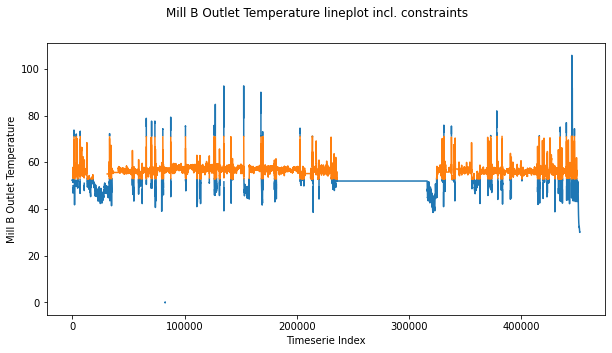

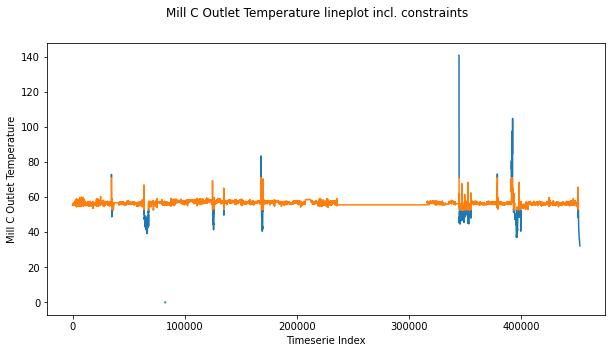

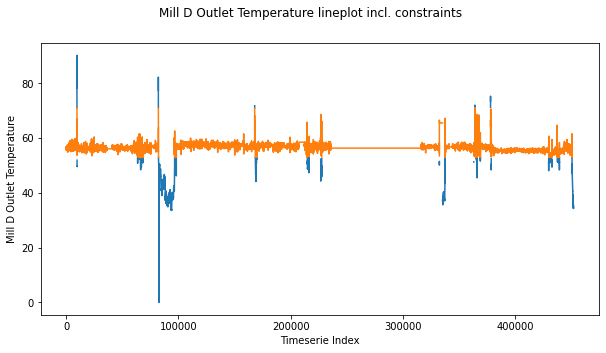

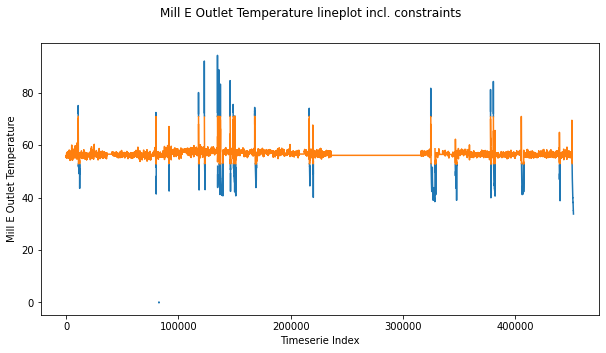

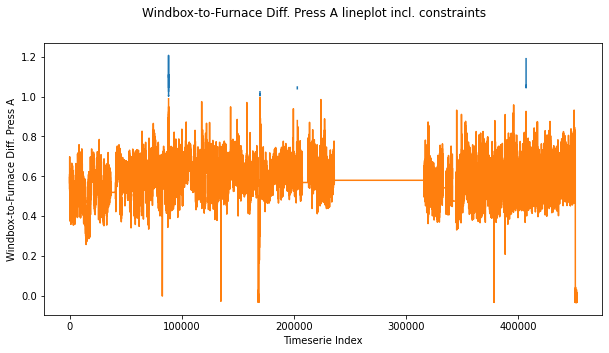

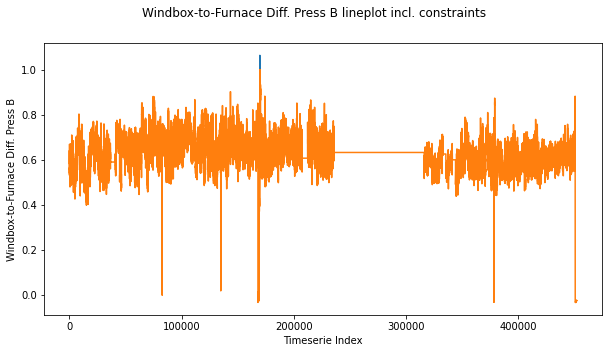

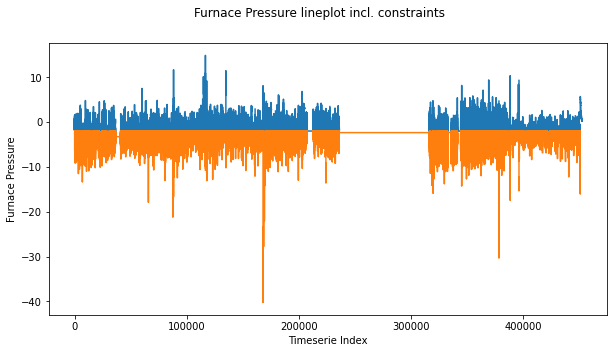

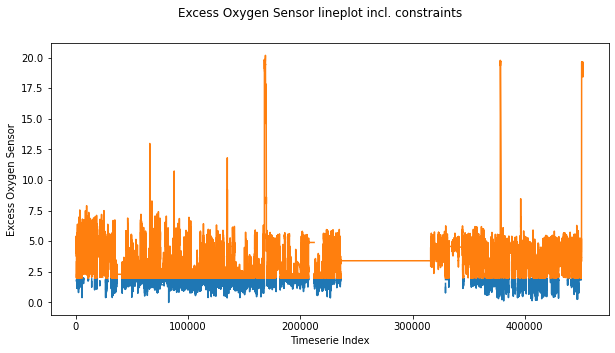

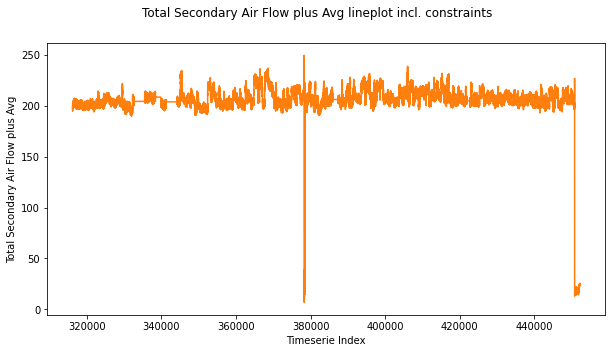

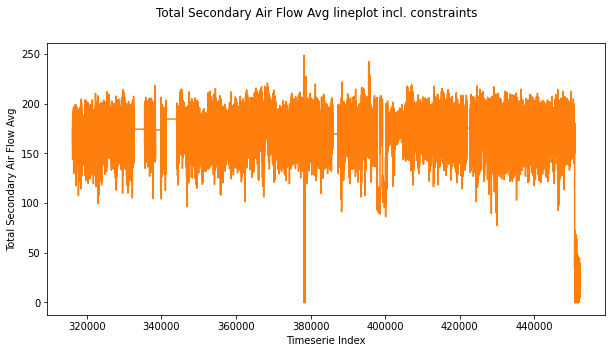

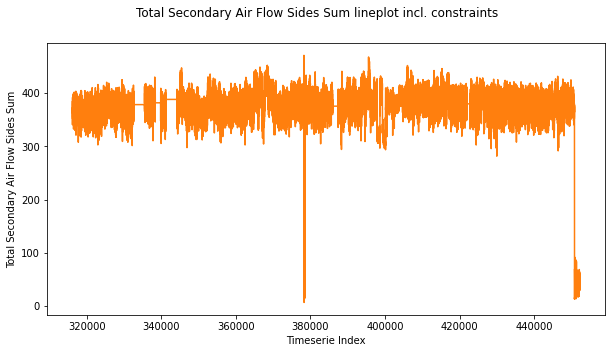

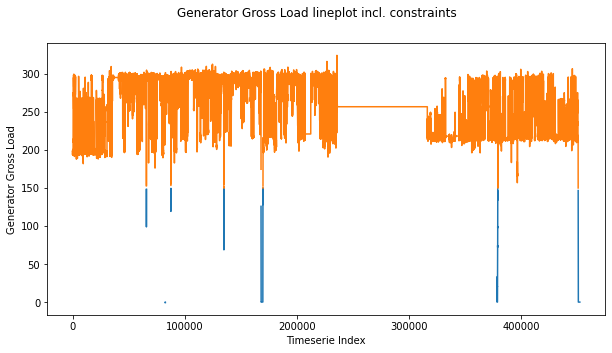

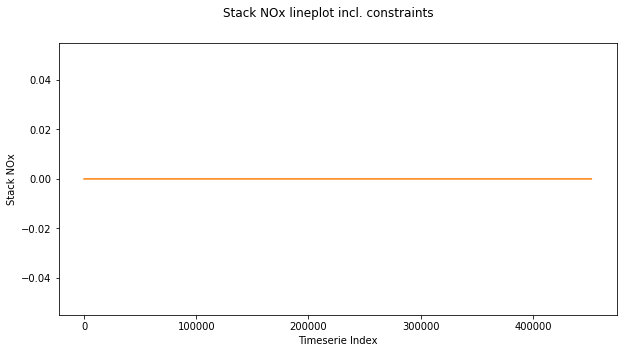

In [4]:
visualize_postconversion_constraints(pivoted_converted_dataset, pct1, ignore_groups)

In [1]:
sum(pivoted_converted_dataset["Total Secondary Air Flow Sides Sum"] == 0)

NameError: name 'pivoted_converted_dataset' is not defined

In [3]:
#PCT2
suffix = 2
converted_dataset = pd.read_csv(f"dataset_{config.PCT2_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, pct2, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
Burner Tilt Position 1L,,-0.017578,101.187500,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2R,,-0.023438,101.863281,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2L,,0.000000,100.058594,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 3R,,-1.230469,100.195312,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 4L,,-0.005859,101.619141,[RECOMMENDATION_MV_VARIABLES]
Total Secondary Air Flow Sides Sum,0.27875,178.294549,466.055378,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 1R,,-0.033203,100.535156,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 3L,,-0.007812,100.523438,[RECOMMENDATION_MV_VARIABLES]
FDF Fan Air Flow Calc,,377.570465,922.602783,[RECOMMENDATION_MV_VARIABLES]


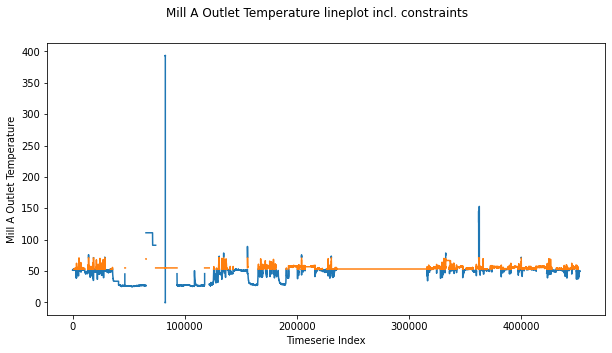

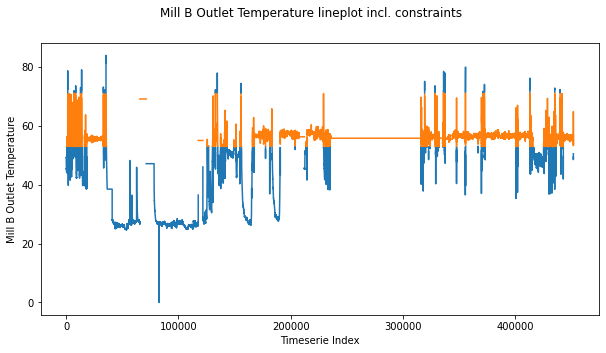

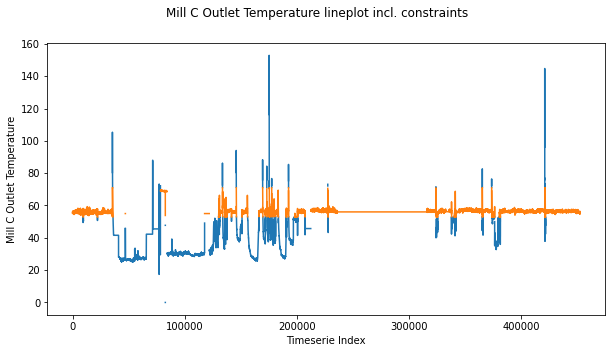

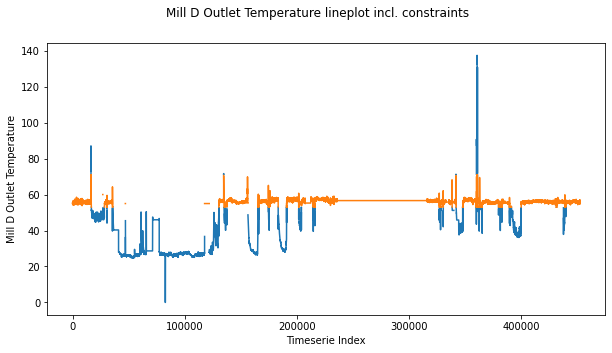

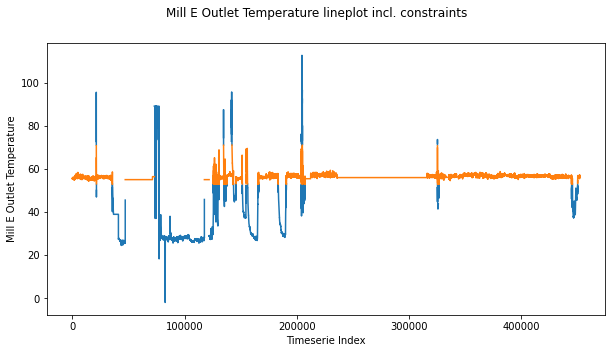

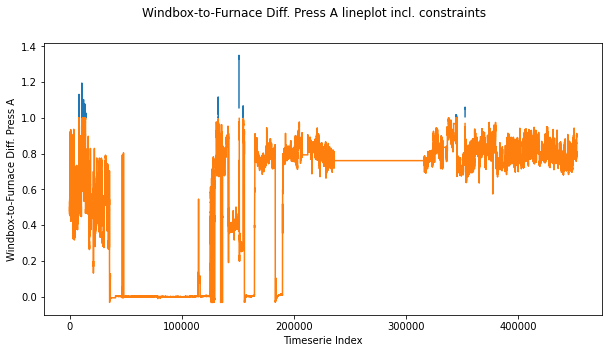

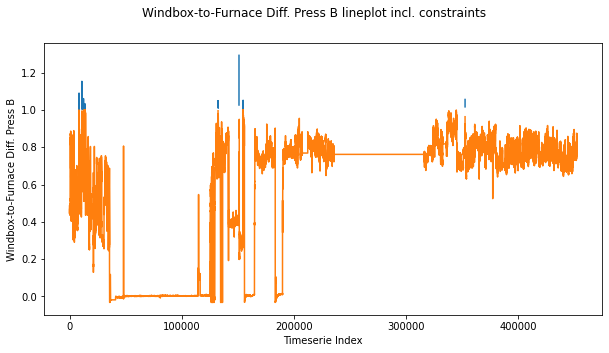

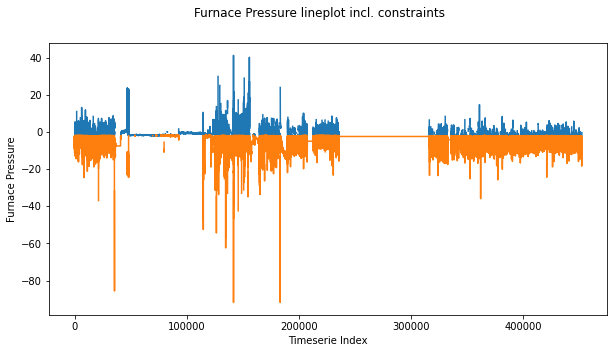

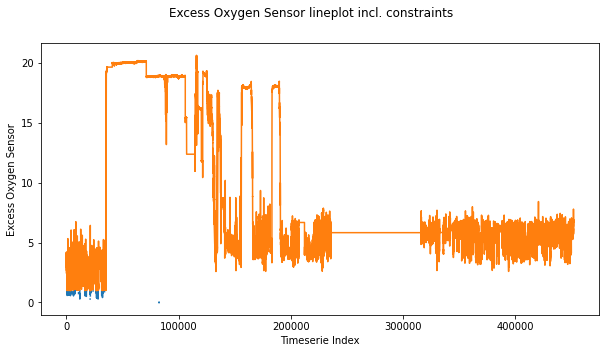

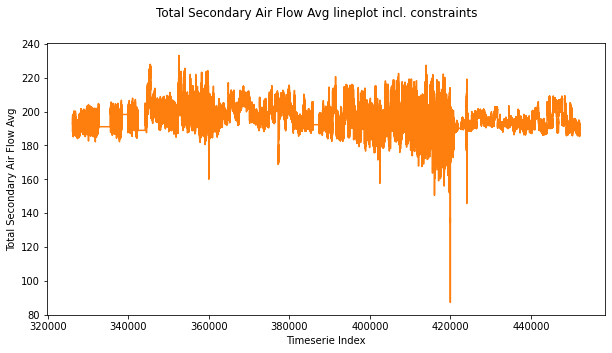

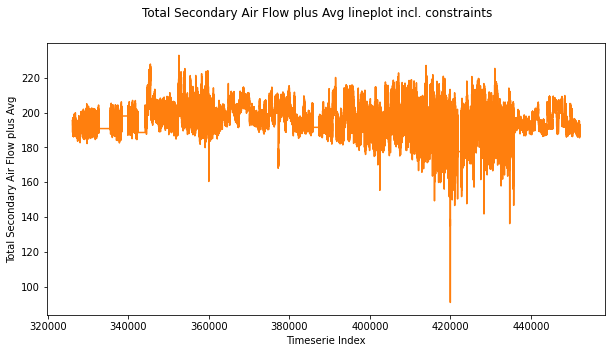

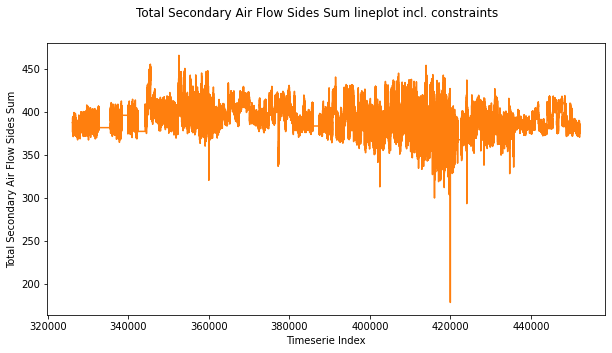

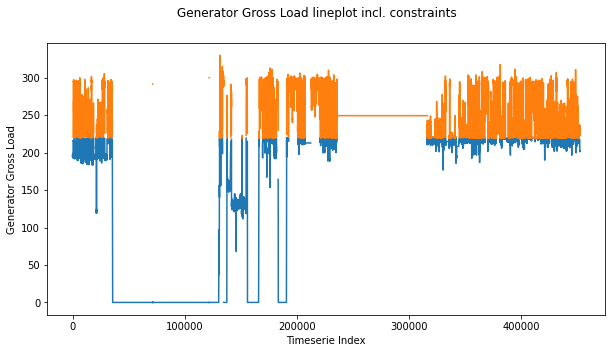

In [4]:
visualize_postconversion_constraints(pivoted_converted_dataset, pct2, ignore_groups)

In [5]:
#RBG1

suffix = 2
converted_dataset = pd.read_csv(f"dataset_{config.RBG1_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, rbg1, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
Burner Tilt Position 3L,,0.000000,90.556641,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2R,,-1.873047,100.000000,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 1L,,0.000000,96.570312,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 3R,,0.000000,91.210938,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 1R,,0.000000,90.044922,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 4L,,0.000000,90.158203,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 4R,,0.000000,90.878906,[RECOMMENDATION_MV_VARIABLES]
Total Secondary Air Flow,0.999368,0.000000,831.462952,[RECOMMENDATION_MV_VARIABLES]
Burner Tilt Position 2L,,-0.587891,99.970703,[RECOMMENDATION_MV_VARIABLES]


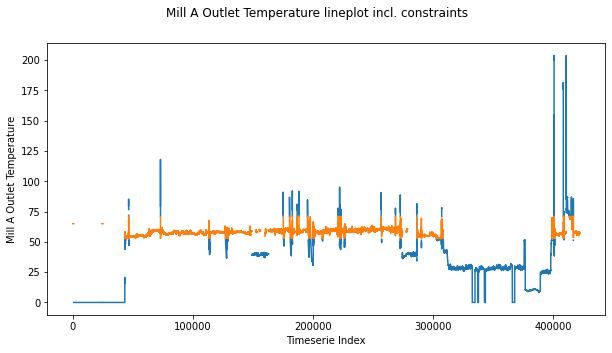

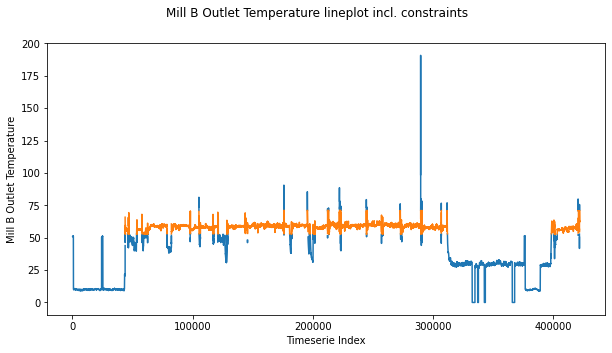

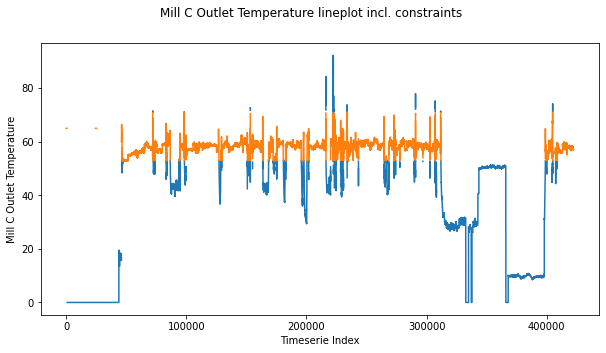

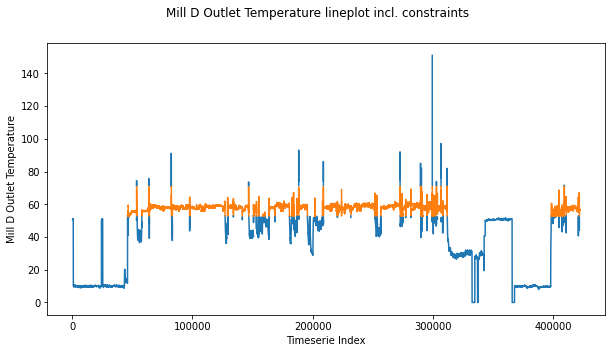

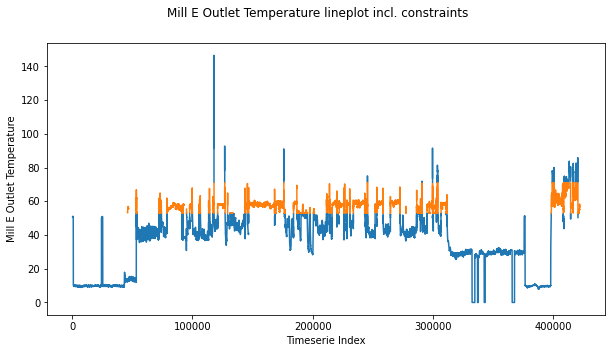

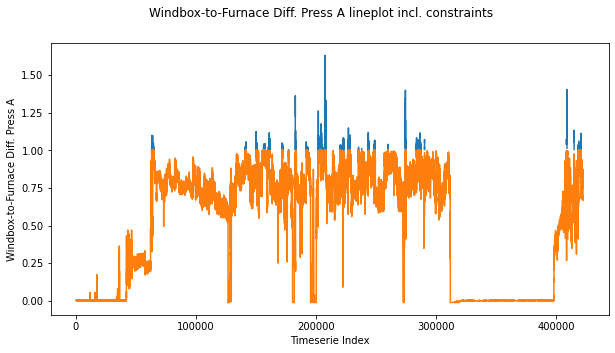

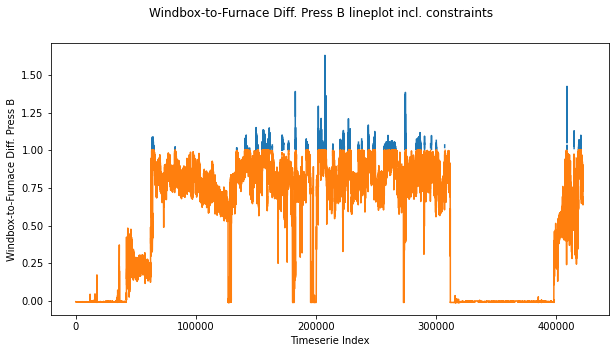

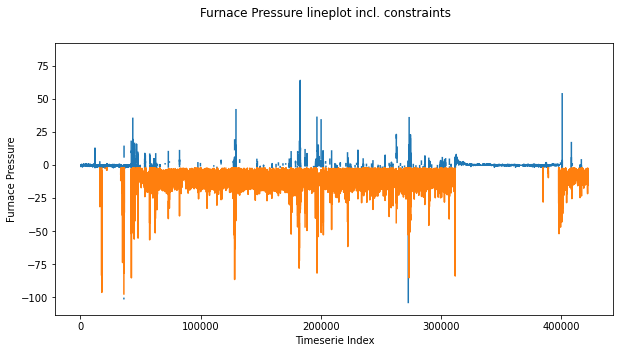

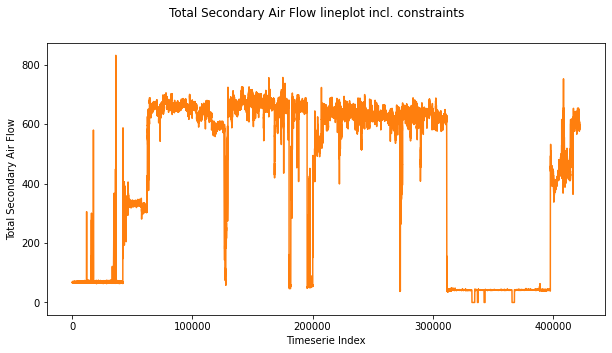

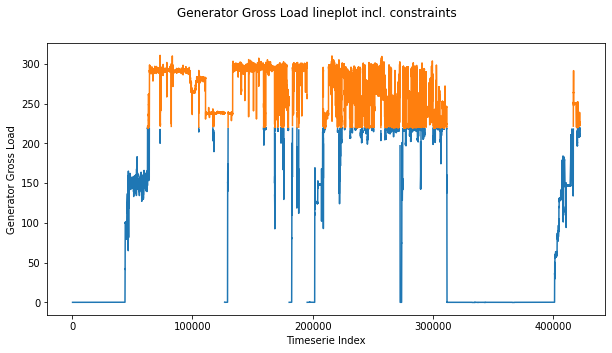

In [10]:
visualize_postconversion_constraints(pivoted_converted_dataset, rbg1, ignore_groups)

In [ ]:
#RBG2

suffix = 0
converted_dataset = pd.read_csv(f"dataset_{config.RBG2_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, rbg2, ignore_groups)

In [ ]:
visualize_postconversion_constraints(pivoted_converted_dataset, rbg1, ignore_groups)

In [3]:
#KTT 1

suffix = 0
converted_dataset = pd.read_csv(f"dataset_{config.KTT1_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, ktt1, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
Total Secondary Air Flow,,0.000000,169477.569824,[RECOMMENDATION_MV_VARIABLES]
Excess Oxygen Sensor,0.938539,-3.587229,23.955783,[RECOMMENDATION_TARGET_VARIABLES]
Generator Gross Load,0.562273,-0.577317,125.374580,"[DV_VARIABLES, MODELLING_CONSTRAINT_VARIABLES]"
Bed Temperature,1.0,0.000000,960.381363,[DV_VARIABLES]
Total Primary Air Flow,,0.000000,134395.503815,[DV_VARIABLES]
Coal Flow,,-0.000079,24.432157,[DV_VARIABLES]
Furnace Temperature,1.0,0.000000,907.086639,[MV_DEPENDENT_CONSTRAINTS]
Windbox-to-Furnace Diff. Press B,0.000009,-0.527518,3.988645,[MV_DEPENDENT_CONSTRAINTS]
Windbox-to-Furnace Diff. Press A,0.999995,-0.470113,4.234596,[MV_DEPENDENT_CONSTRAINTS]


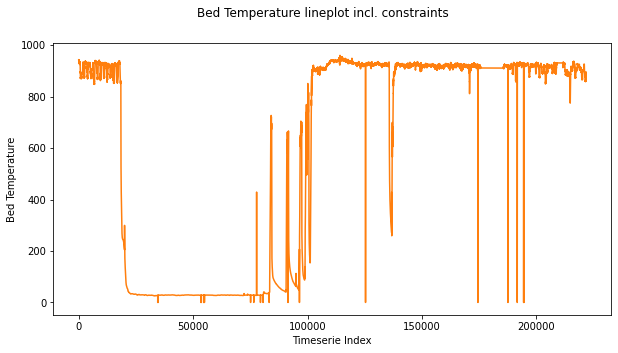

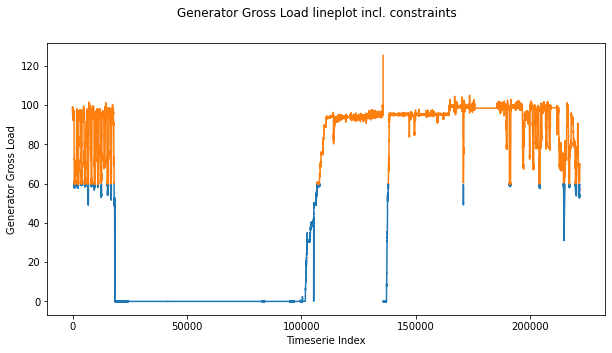

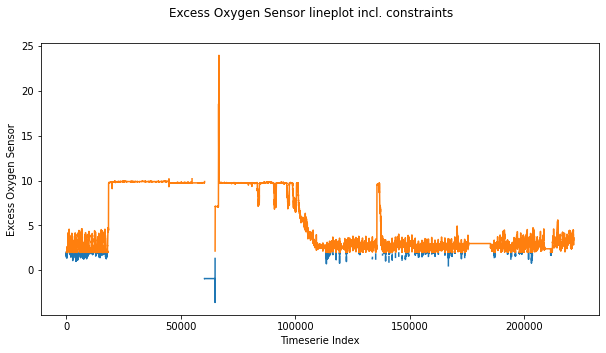

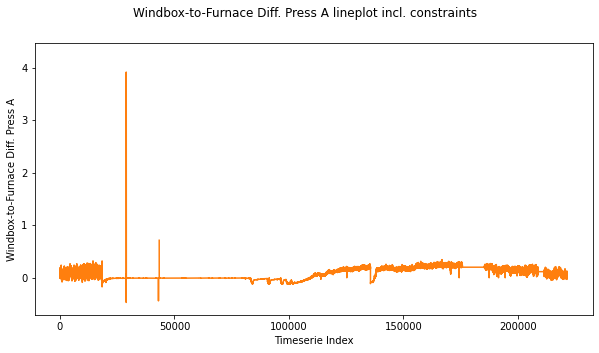

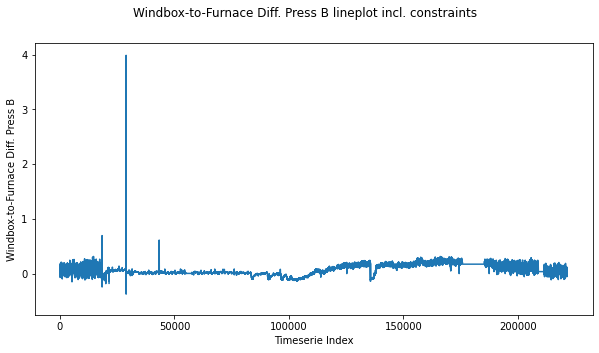

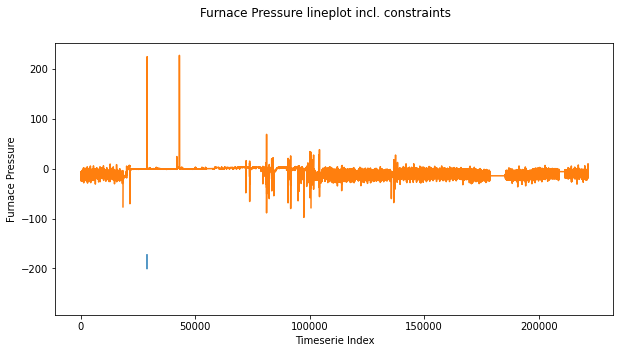

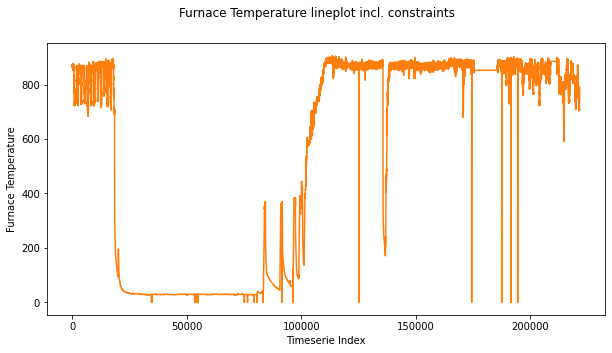

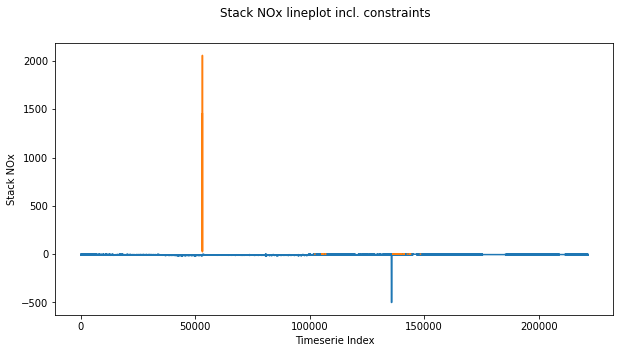

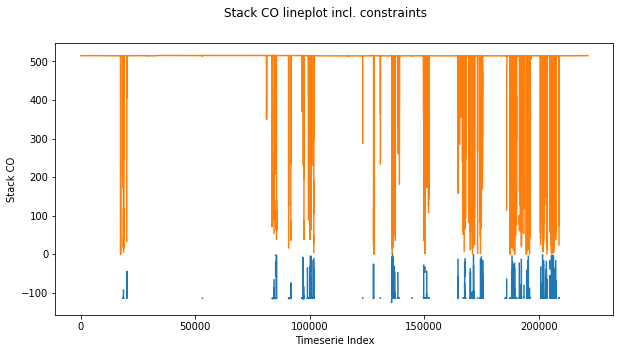

In [4]:
visualize_postconversion_constraints(pivoted_converted_dataset, ktt1, ignore_groups)

In [3]:
# KTT2

suffix = 3
converted_dataset = pd.read_csv(f"dataset_{config.KTT2_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, ktt2, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
Total Secondary Air Flow,,0.000000,225587.661133,[RECOMMENDATION_MV_VARIABLES]
Excess Oxygen A Side 1,0.965147,0.000000,19.591438,[RECOMMENDATION_TARGET_VARIABLES]
Excess Oxygen B Side 1,0.988129,0.000000,20.518282,[RECOMMENDATION_TARGET_VARIABLES]
Total Primary Air Flow,,178.000000,184666.384155,[DV_VARIABLES]
Bed Temperature,0.909227,0.000000,1012.909531,[DV_VARIABLES]
Coal Flow,,-1.632111,25.507362,[DV_VARIABLES]
Generator Gross Load,0.835826,-0.156351,104.229340,"[DV_VARIABLES, MODELLING_CONSTRAINT_VARIABLES]"
Windbox-to-Furnace Diff. Press A,1.0,-106.237091,367.255127,[MV_DEPENDENT_CONSTRAINTS]
Furnace Temperature,,-15.867678,922.658325,[MV_DEPENDENT_CONSTRAINTS]


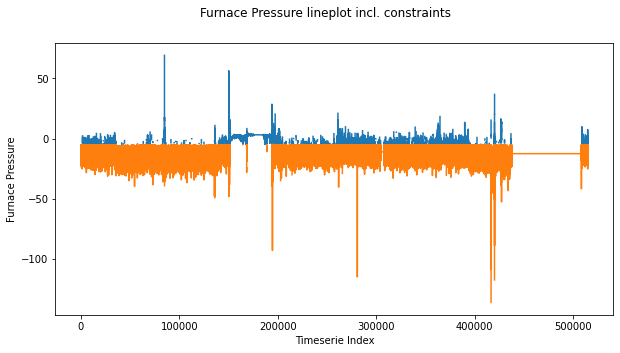

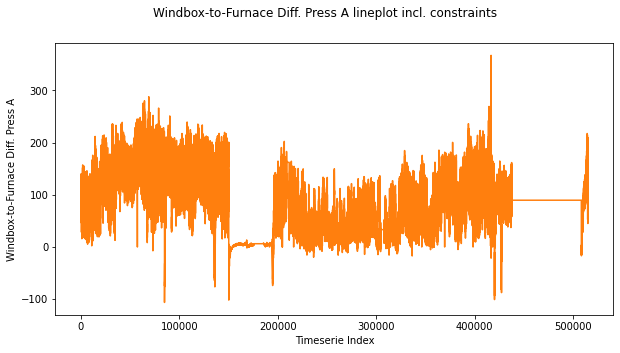

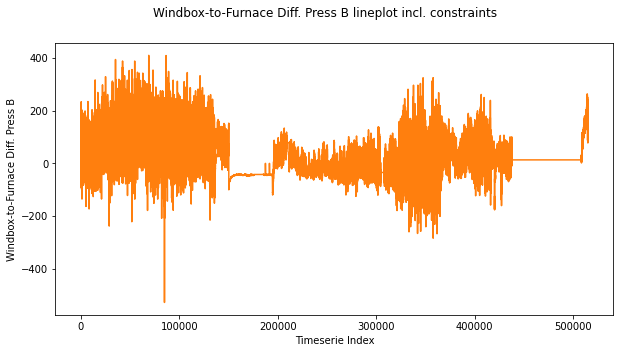

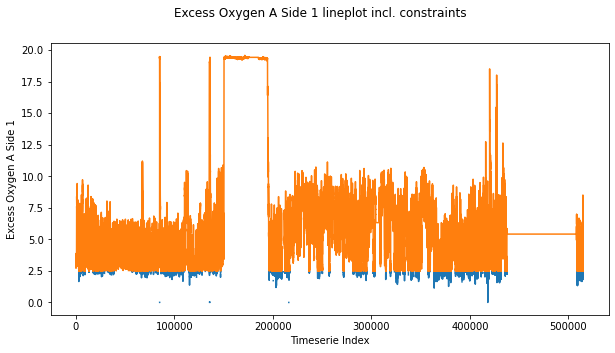

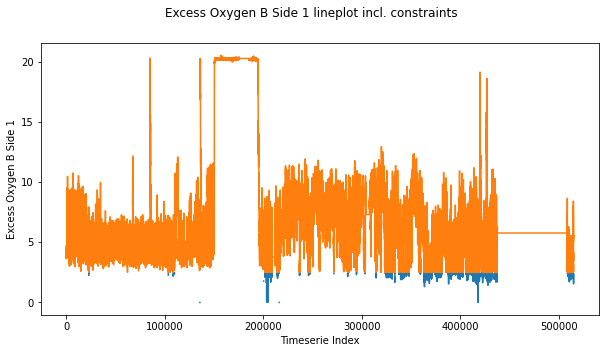

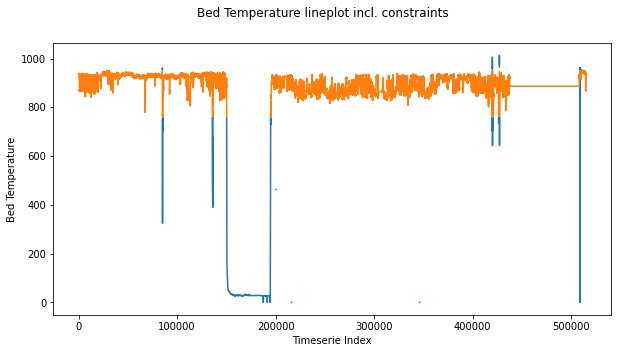

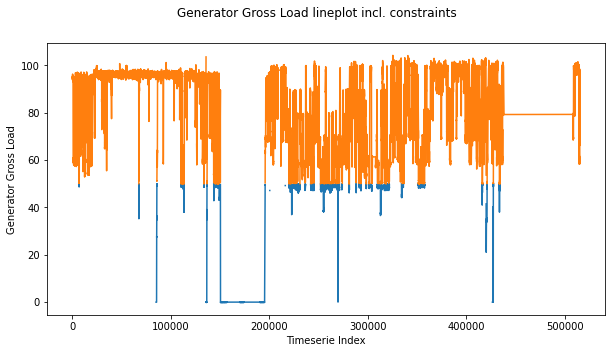

In [4]:
visualize_postconversion_constraints(pivoted_converted_dataset, ktt1, ignore_groups)

In [3]:
#AMG 1

suffix = 2
converted_dataset = pd.read_csv(f"dataset_{config.AMG1_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, amg1, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
SA Heater Out Press,,0.000000,8.576313,[RECOMMENDATION_MV_VARIABLES]
Total Secondary Air Flow,,0.000000,22145.396484,[RECOMMENDATION_MV_VARIABLES]
Excess Oxygen B Side 1,0.994469,0.000000,24.810745,[RECOMMENDATION_TARGET_VARIABLES]
Excess Oxygen A Side 1,0.998639,0.000000,20.030525,[RECOMMENDATION_TARGET_VARIABLES]
Coal Flow,,0.000000,7.765432,[DV_VARIABLES]
Generator Gross Load,0.331691,0.036630,26.263737,"[DV_VARIABLES, MODELLING_CONSTRAINT_VARIABLES]"
Total Primary Air Flow,,182.589905,36778.246704,[DV_VARIABLES]
Windbox-to-Furnace Diff. Press A,1.0,-0.540904,0.653236,[MV_DEPENDENT_CONSTRAINTS]
Furnace Temperature,0.298039,14.945055,1200.000000,[MV_DEPENDENT_CONSTRAINTS]


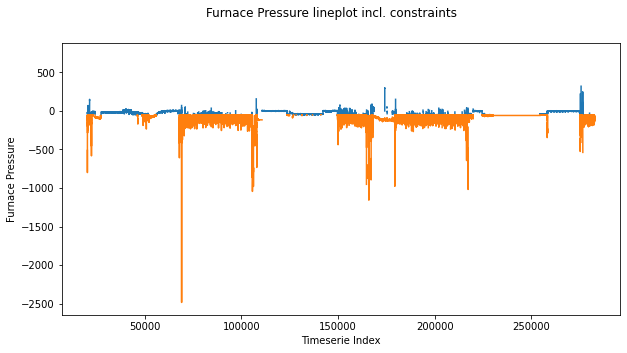

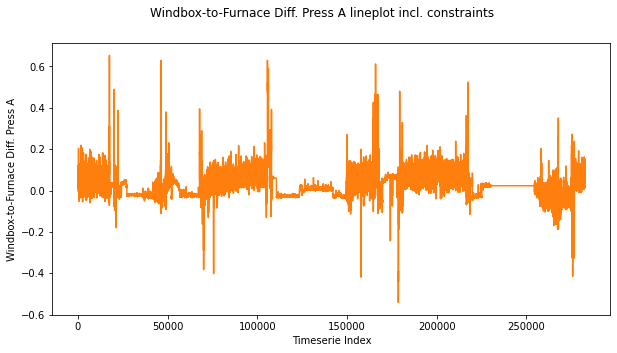

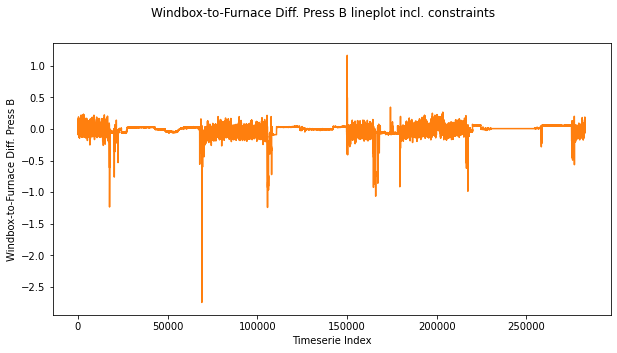

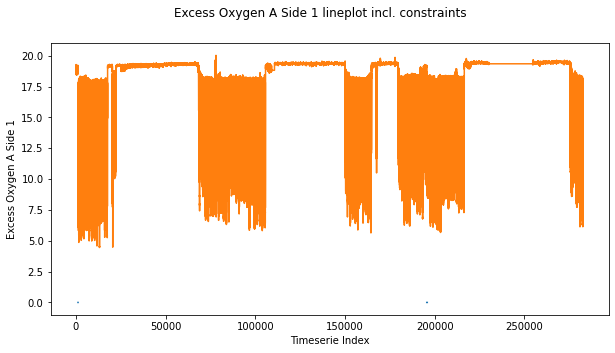

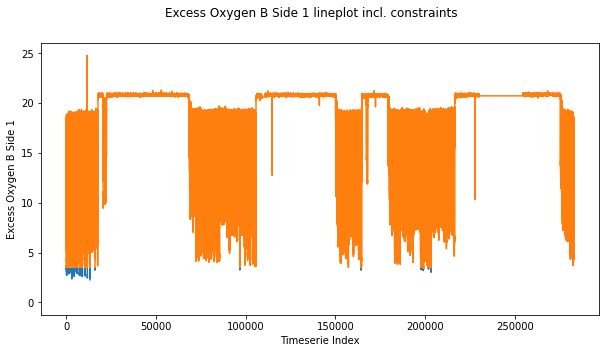

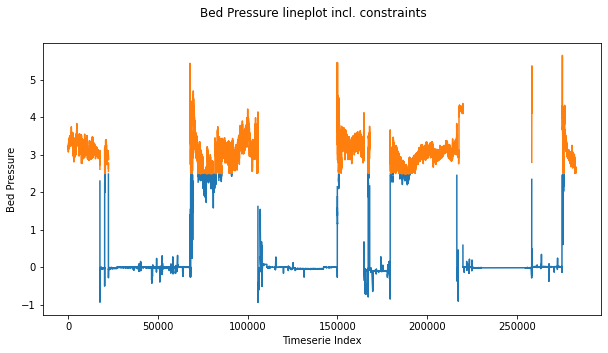

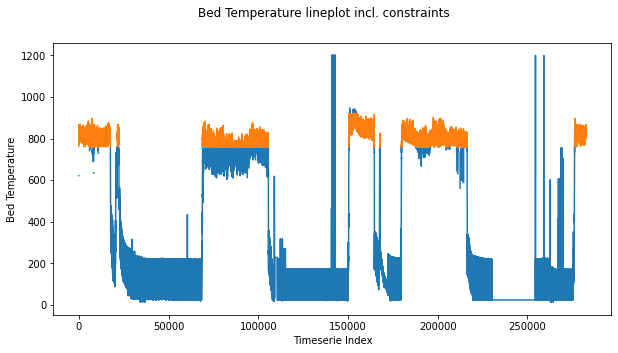

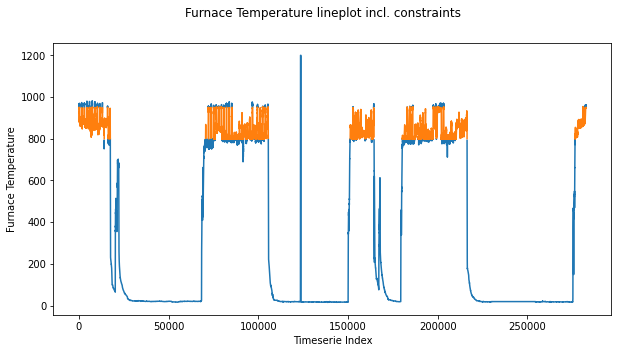

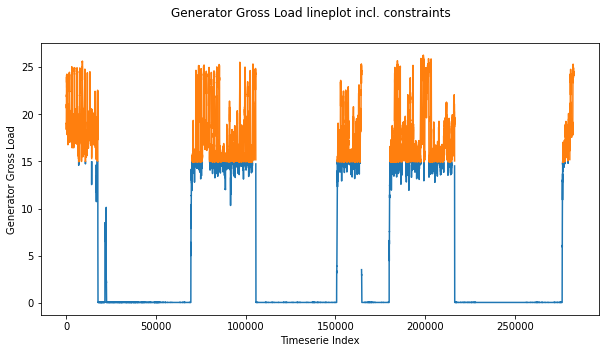

In [4]:
visualize_postconversion_constraints(pivoted_converted_dataset, amg1, ignore_groups)

In [4]:
#AMG 2

suffix = 2
converted_dataset = pd.read_csv(f"dataset_{config.AMG2_DATA_TAG}_{suffix}.csv")
pivoted_converted_dataset = converted_dataset.pivot(index="date_rec",
                                                    columns="address_no",
                                                    values="value")

ignore_groups = ["MODELLED_TAGS", "IGNORED_TAGS"]

create_postconversion_checkup_table(pivoted_converted_dataset, amg2, ignore_groups)

,constraint_ratio,min,max,groups
varname,,,,
SA Heater Out Press,,0.000000,9.619536,[RECOMMENDATION_MV_VARIABLES]
Excess Oxygen A Side 1,0.9654,0.000000,21.923077,[RECOMMENDATION_TARGET_VARIABLES]
Excess Oxygen B Side 1,0.958038,0.000000,25.000000,[RECOMMENDATION_TARGET_VARIABLES]
PA Heater Out Press,,0.000000,12.600734,[DV_VARIABLES]
Coal Flow,,0.000000,13.611993,[DV_VARIABLES]
Generator Gross Load,0.703184,0.018315,26.153847,"[DV_VARIABLES, MODELLING_CONSTRAINT_VARIABLES]"
Bed Pressure plus,,-6.000000,7.331380,[MV_DEPENDENT_CONSTRAINTS]
Bed Pressure,0.734099,-2.913309,6.393651,[MV_DEPENDENT_CONSTRAINTS]
Bed Temperature,0.135039,0.000000,1187.106201,[MV_DEPENDENT_CONSTRAINTS]


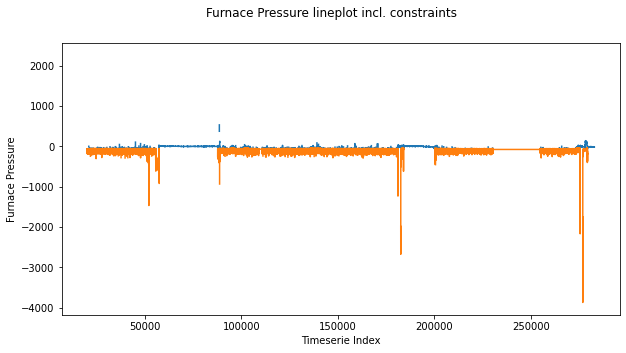

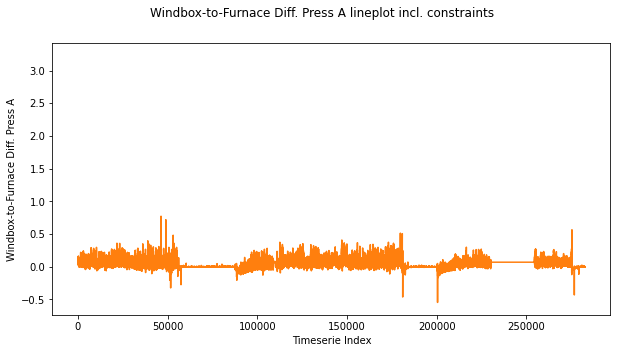

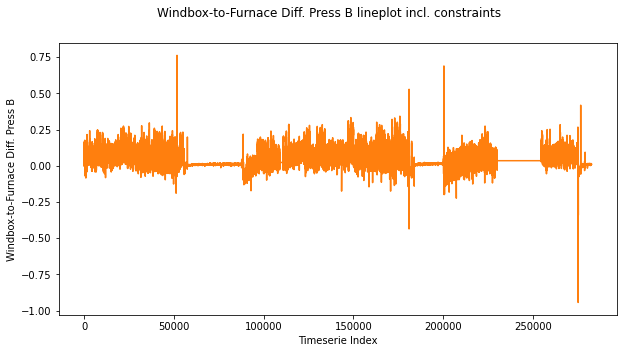

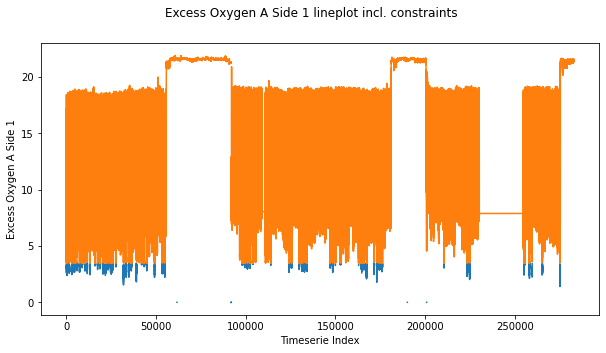

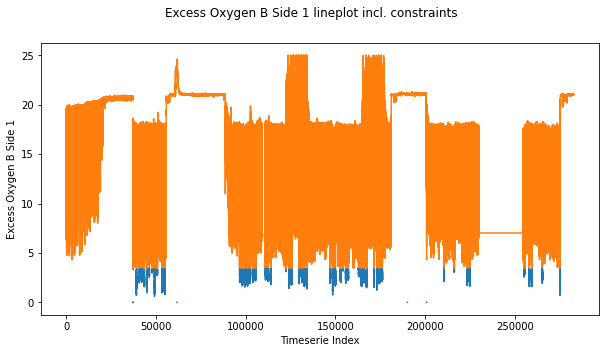

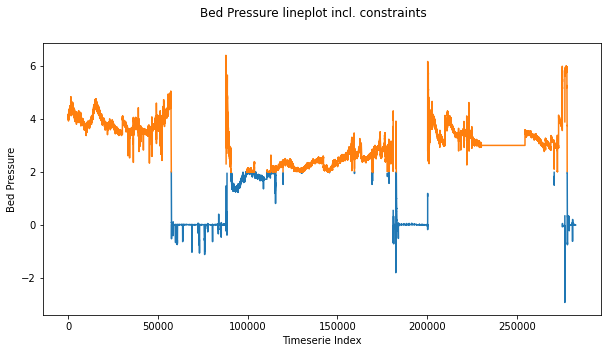

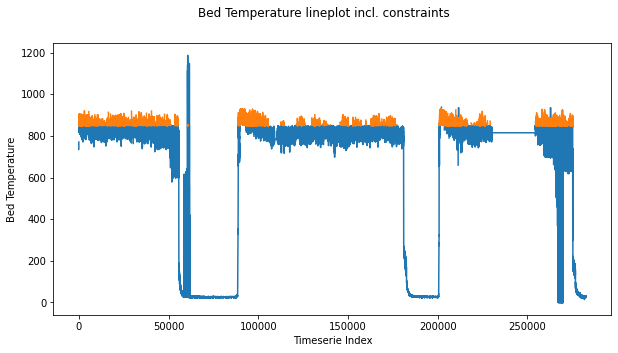

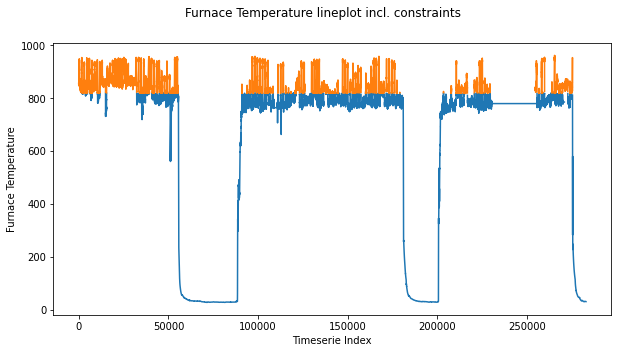

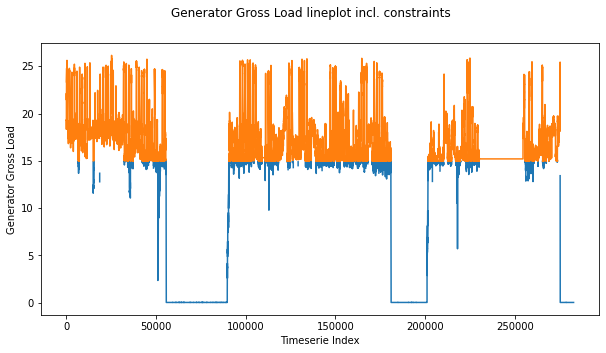

In [6]:
visualize_postconversion_constraints(pivoted_converted_dataset, amg2, ignore_groups)